# Pneumonia Classification

**Target:** To build a model that can recognize pneumonia in lung using Deep Learning.


**About the model:** We use a model here known as `resnet34`, trained using about `1.3` million images.

**Dataset:** *Mohirdev Pnevmoniya* (dataset consisting of `5226` CXR pictures)

## Library installation
We need:

`fastai==2.5.3` version or above

`torch==1.10.0+cu111` version or above

In [2]:
import torch
import fastai

print(torch.__version__)
print(fastai.__version__)

2.0.1+cu118
2.7.12




---

**❗Make sure you turned on GPU**

In [3]:
torch.cuda.is_available()

True

In [16]:
from fastai.vision.all import *
from ipywidgets import widgets

train_path = Path('/content/drive/MyDrive/DS_AI/Datasets/pnevmoniya/train')
fls = get_image_files(train_path)

In [17]:
train_path.ls()

(#2) [Path('/content/drive/MyDrive/DS_AI/Datasets/pnevmoniya/train/PNEUMONIA'),Path('/content/drive/MyDrive/DS_AI/Datasets/pnevmoniya/train/NORMAL')]

In [18]:
(train_path/"NORMAL").ls()

(#1351) [Path('/content/drive/MyDrive/DS_AI/Datasets/pnevmoniya/train/NORMAL/IM-0523-0001-0002.jpeg'),Path('/content/drive/MyDrive/DS_AI/Datasets/pnevmoniya/train/NORMAL/IM-0505-0001.jpeg'),Path('/content/drive/MyDrive/DS_AI/Datasets/pnevmoniya/train/NORMAL/IM-0523-0001.jpeg'),Path('/content/drive/MyDrive/DS_AI/Datasets/pnevmoniya/train/NORMAL/IM-0525-0001.jpeg'),Path('/content/drive/MyDrive/DS_AI/Datasets/pnevmoniya/train/NORMAL/IM-0527-0001.jpeg'),Path('/content/drive/MyDrive/DS_AI/Datasets/pnevmoniya/train/NORMAL/IM-0525-0001-0001.jpeg'),Path('/content/drive/MyDrive/DS_AI/Datasets/pnevmoniya/train/NORMAL/IM-0539-0001-0001.jpeg'),Path('/content/drive/MyDrive/DS_AI/Datasets/pnevmoniya/train/NORMAL/IM-0551-0001-0001.jpeg'),Path('/content/drive/MyDrive/DS_AI/Datasets/pnevmoniya/train/NORMAL/IM-0536-0001.jpeg'),Path('/content/drive/MyDrive/DS_AI/Datasets/pnevmoniya/train/NORMAL/IM-0537-0001.jpeg')...]

In [35]:
(train_path/"PNEUMONIA").ls()

(#3875) [Path('/content/drive/MyDrive/DS_AI/Datasets/pnevmoniya/train/PNEUMONIA/person1518_bacteria_3969.jpeg'),Path('/content/drive/MyDrive/DS_AI/Datasets/pnevmoniya/train/PNEUMONIA/person1517_virus_2644.jpeg'),Path('/content/drive/MyDrive/DS_AI/Datasets/pnevmoniya/train/PNEUMONIA/person1507_bacteria_3935.jpeg'),Path('/content/drive/MyDrive/DS_AI/Datasets/pnevmoniya/train/PNEUMONIA/person1511_bacteria_3955.jpeg'),Path('/content/drive/MyDrive/DS_AI/Datasets/pnevmoniya/train/PNEUMONIA/person1507_bacteria_3948.jpeg'),Path('/content/drive/MyDrive/DS_AI/Datasets/pnevmoniya/train/PNEUMONIA/person1507_bacteria_3946.jpeg'),Path('/content/drive/MyDrive/DS_AI/Datasets/pnevmoniya/train/PNEUMONIA/person1507_bacteria_3942.jpeg'),Path('/content/drive/MyDrive/DS_AI/Datasets/pnevmoniya/train/PNEUMONIA/person1507_bacteria_3947.jpeg'),Path('/content/drive/MyDrive/DS_AI/Datasets/pnevmoniya/train/PNEUMONIA/person1507_bacteria_3943.jpeg'),Path('/content/drive/MyDrive/DS_AI/Datasets/pnevmoniya/train/PNEUMO

In [33]:
!ls $train_path/"NORMAL"

 IM-0115-0001.jpeg		  NORMAL2-IM-0472-0001.jpeg
 IM-0117-0001.jpeg		  NORMAL2-IM-0473-0001.jpeg
 IM-0119-0001.jpeg		  NORMAL2-IM-0474-0001.jpeg
 IM-0122-0001.jpeg		  NORMAL2-IM-0475-0001.jpeg
 IM-0125-0001.jpeg		  NORMAL2-IM-0476-0001.jpeg
 IM-0127-0001.jpeg		  NORMAL2-IM-0478-0001.jpeg
 IM-0128-0001.jpeg		  NORMAL2-IM-0479-0001.jpeg
 IM-0129-0001.jpeg		  NORMAL2-IM-0480-0001.jpeg
 IM-0131-0001.jpeg		  NORMAL2-IM-0481-0001.jpeg
 IM-0133-0001.jpeg		  NORMAL2-IM-0482-0001.jpeg
 IM-0135-0001.jpeg		  NORMAL2-IM-0485-0001.jpeg
 IM-0137-0001.jpeg		  NORMAL2-IM-0486-0001.jpeg
 IM-0140-0001.jpeg		  NORMAL2-IM-0487-0001.jpeg
 IM-0141-0001.jpeg		  NORMAL2-IM-0488-0001.jpeg
 IM-0143-0001.jpeg		  NORMAL2-IM-0489-0001.jpeg
 IM-0145-0001.jpeg		  NORMAL2-IM-0490-0001.jpeg
 IM-0147-0001.jpeg		  NORMAL2-IM-0491-0001.jpeg
 IM-0149-0001.jpeg		  NORMAL2-IM-0493-0001.jpeg
 IM-0151-0001.jpeg		  NORMAL2-IM-0496-0001.jpeg
 IM-0152-0001.jpeg		  NORMAL2-IM-0497-0001.jpeg
 IM-0154-0001.jpeg		  NORMAL2-IM-0499-00

In [34]:
!ls $train_path/"PNEUMONIA"

person1000_bacteria_2931.jpeg  person30_bacteria_149.jpeg
person1000_virus_1681.jpeg     person30_bacteria_150.jpeg
person1001_bacteria_2932.jpeg  person30_bacteria_151.jpeg
person1002_bacteria_2933.jpeg  person30_bacteria_152.jpeg
person1003_bacteria_2934.jpeg  person30_bacteria_153.jpeg
person1003_virus_1685.jpeg     person30_bacteria_154.jpeg
person1004_bacteria_2935.jpeg  person30_bacteria_155.jpeg
person1004_virus_1686.jpeg     person30_bacteria_156.jpeg
person1005_bacteria_2936.jpeg  person30_bacteria_157.jpeg
person1005_virus_1688.jpeg     person30_bacteria_158.jpeg
person1006_bacteria_2937.jpeg  person310_bacteria_1450.jpeg
person1007_bacteria_2938.jpeg  person310_bacteria_1451.jpeg
person1007_virus_1690.jpeg     person310_virus_633.jpeg
person1008_bacteria_2939.jpeg  person311_bacteria_1452.jpeg
person1008_virus_1691.jpeg     person311_bacteria_1453.jpeg
person1009_virus_1694.jpeg     person311_virus_634.jpeg
person100_virus_184.jpeg       person312_bacteria_1454.jpeg
person10

## Checking Images

Dataset was uploaded to my **Google Drive**,therefore we should check if images were corrupted or not

In [21]:
failed = verify_images(train_path)
print("Failed to verify:", failed)

'PosixPath' object is not iterable
Failed to verify: []


## Building DataBlock

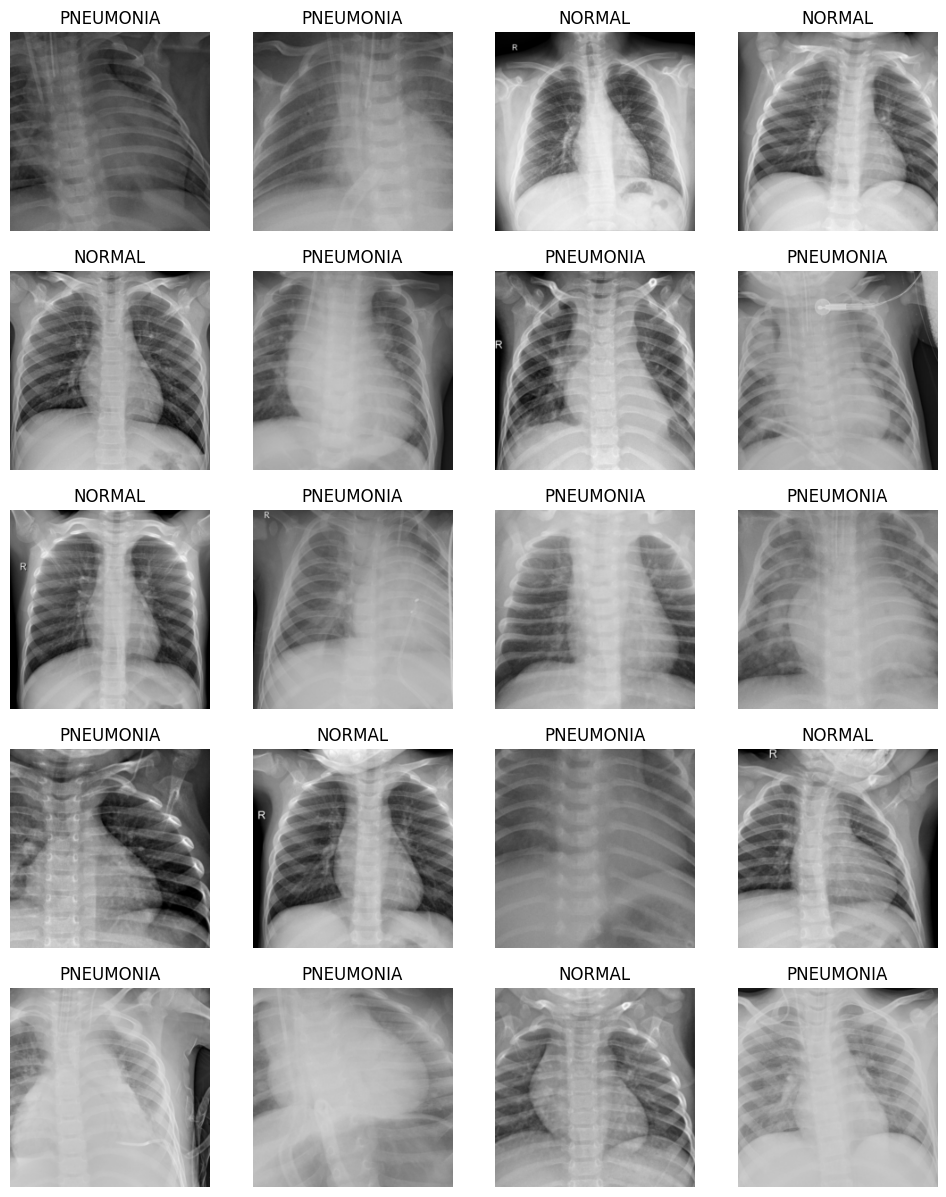

In [22]:
dblocks = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.1, seed=42),
    get_y = parent_label,
    item_tfms = Resize(224)
)

dls = dblocks.dataloaders(train_path)

dls.train.show_batch(max_n=20, nrows=5)

## Model building

In [23]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(5)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593

epoch,train_loss,valid_loss,accuracy,time
0,0.429077,0.223334,0.934866,32:37


epoch,train_loss,valid_loss,accuracy,time
0,0.146825,0.110911,0.973180,02:01
1,0.089906,0.098428,0.969349,01:56
2,0.049303,0.049948,0.984674,01:57
3,0.023504,0.046764,0.986590,01:58
4,0.014920,0.052975,0.986590,01:56


## Export the model

In [26]:
learn.export("pneumonia_model.pkl")

In [27]:
learn.save('pneumonia_model')

Path('models/pneumonia_model.pth')

## Saving results in `CSV` file

In [28]:
df_submission = pd.read_csv("/content/drive/MyDrive/DS_AI/Datasets/pnevmoniya/sample_solution.csv")
df_submission

,id,labels
0,test_img_10001.jpeg,0
1,test_img_10002.jpeg,0
2,test_img_10003.jpeg,0
3,test_img_10004.jpeg,0
4,test_img_10005.jpeg,0
...,...,...
619,test_img_10620.jpeg,0
620,test_img_10621.jpeg,0
621,test_img_10622.jpeg,0
622,test_img_10623.jpeg,0


In [29]:
for row in range(len(df_submission)):
    label = df_submission.loc[row, 'id']
    img = PILImage.create(Path(f"/content/drive/MyDrive/DS_AI/Datasets/pnevmoniya/test/{label}"))
    pred, pred_id, probs = learn.predict(img)
    df_submission.loc[row, 'labels'] = np.array(probs[1])

In [30]:
df_submission.head()

,id,labels
0,test_img_10001.jpeg,0.999924
1,test_img_10002.jpeg,0.042978
2,test_img_10003.jpeg,0.973542
3,test_img_10004.jpeg,0.999893
4,test_img_10005.jpeg,0.000641


In [31]:
df_submission.to_csv("submission_dl_pneumonia.csv", index=False)